Autor: Erick Rodríguez Martínez

Fecha: 20/Febrero/2023



# Machine Learning

## Session #3: Classifying digits with SVM

The aim of this session is to solve a real data problem using SVM implementation of scikit-learn. The problem is based on the <a href = https://en.wikipedia.org/wiki/MNIST_database>  MNIST database</a> of handwritten digits that can be loaded from <a href = http://mldata.org> mldata.org</a>.



# Importar librerias requeridas

In [600]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as pl
from skimage.segmentation import watershed
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, threshold_local
from skimage.filters import threshold_minimum

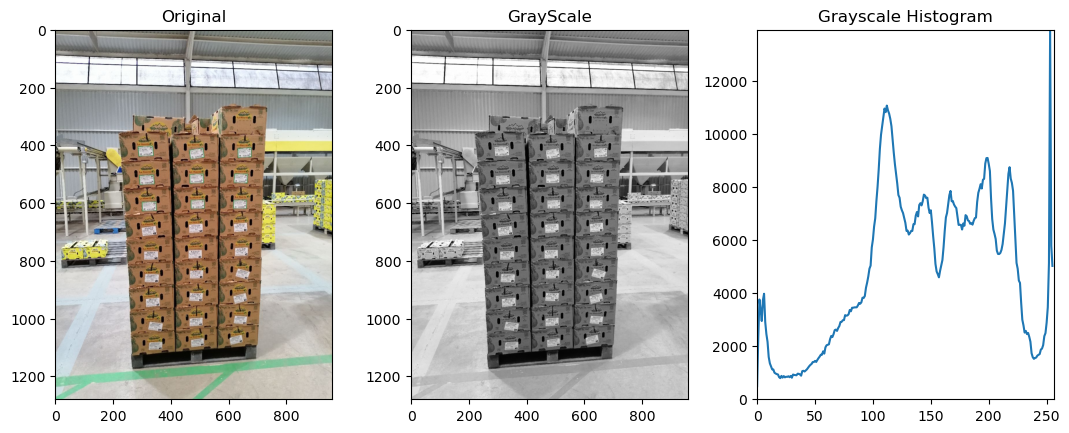

In [601]:
imgBGR = cv2.imread('Pallet.jpeg')
#imgBGR = cv2.imread('water_coins.jpg')
#imgBGR = cv2.imread('PinkAvocado.jpeg')
#imgBGR = cv2.imread('PinkAvocado2.jpeg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

plt.Figure()
pl.subplots_adjust(right=1.7)

pl.subplot(1, 3, 1)
pl.imshow(imgRGB)
plt.title('Original')

pl.subplot(1, 3, 2)
pl.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

pl.subplot(1, 3, 3)
hist = cv2.calcHist([imgGray], [0], None, [256], [0, 256])
plt.title("Grayscale Histogram")
plt.xlim([0, 256])
plt.ylim([0, hist.max()])
plt.plot(hist);

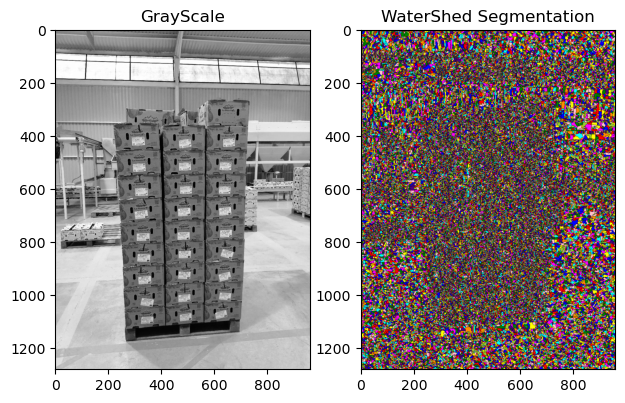

In [602]:
thWaterShed = watershed(imgGray, watershed_line=True)
wSSegmentation = label2rgb(thWaterShed)

plt.figure()
pl.subplots_adjust(right=1.7)
plt.subplots_adjust(right=1)

plt.subplot(1, 2, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 2, 2)
plt.imshow(wSSegmentation)
plt.title('WaterShed Segmentation');

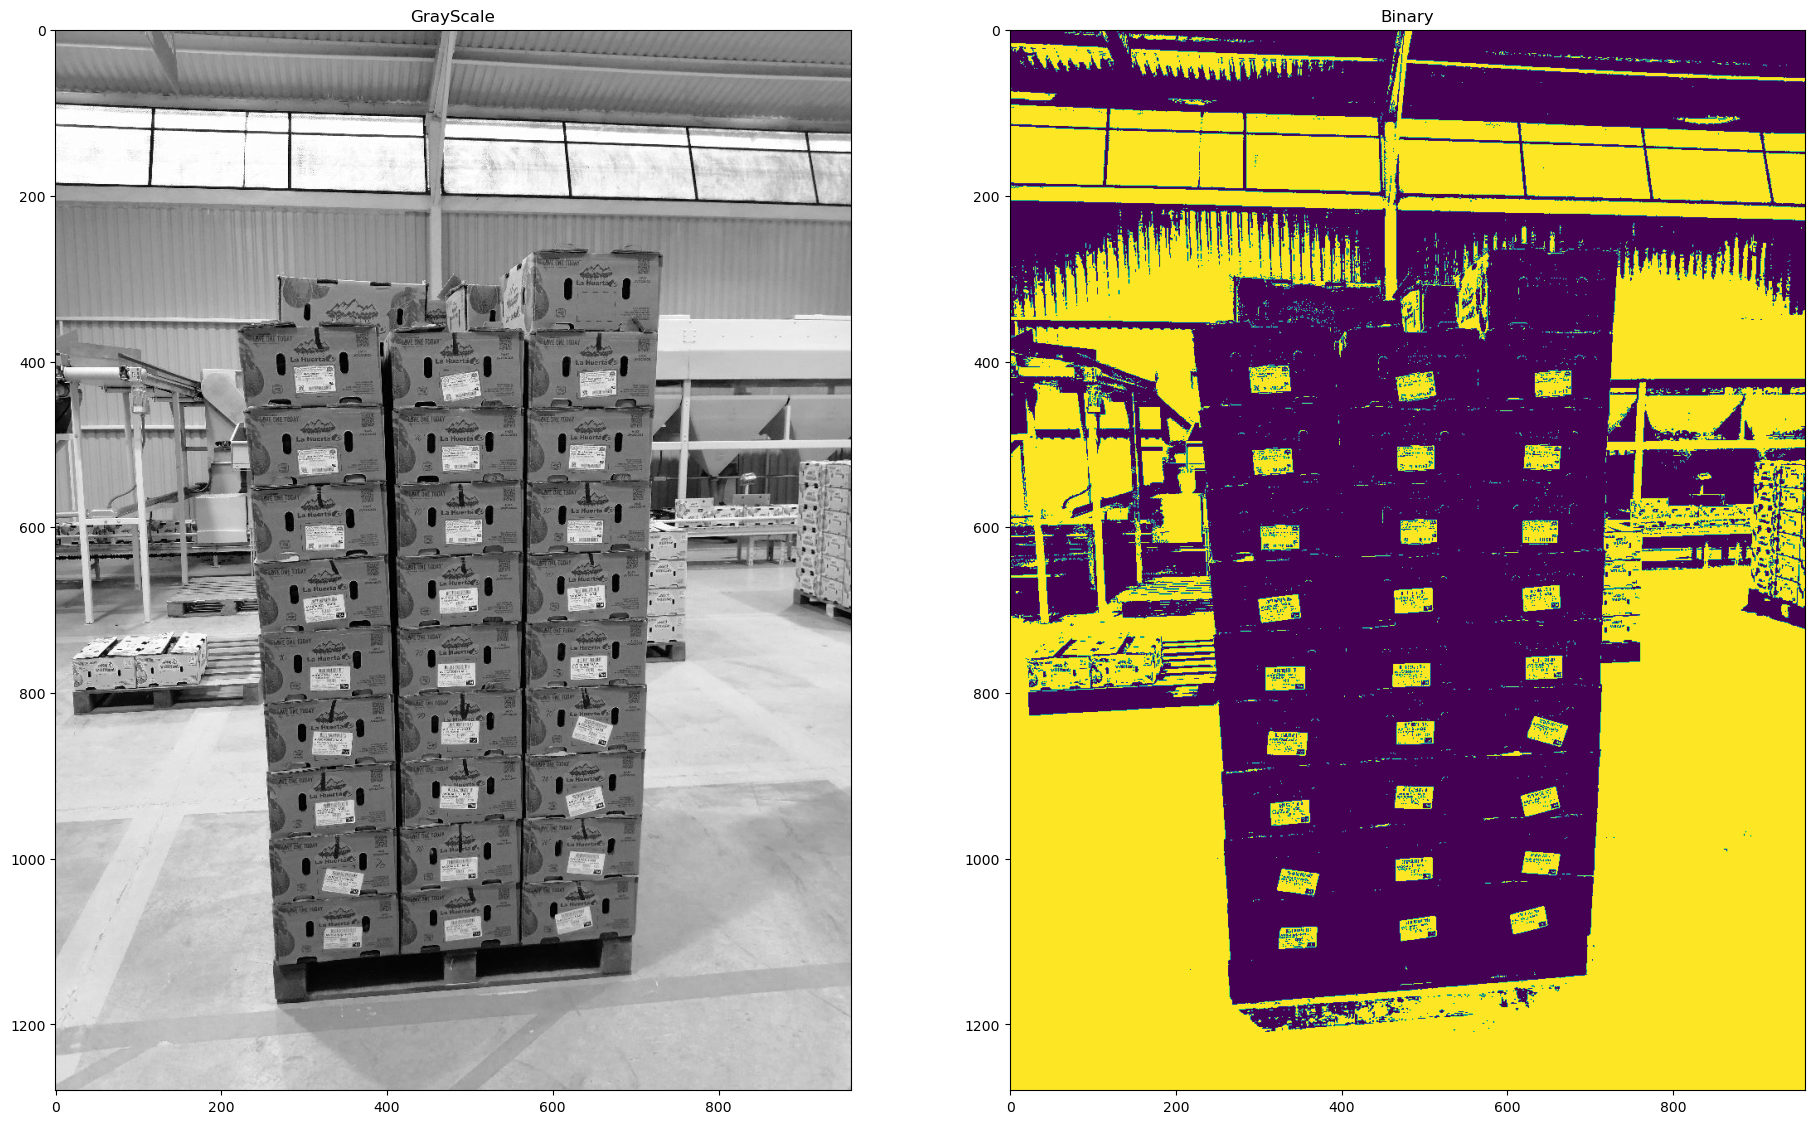

In [603]:
#localMaxima = peak_local_max(imgGray)
#localMinimum = threshold_minimum(imgGray)

otsuTh = threshold_otsu(imgGray)
binary = imgGray > otsuTh


plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1.7)
plt.subplots_adjust(right=1)

plt.subplot(1, 2, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 2, 2)
plt.imshow(binary)
plt.title('Binary');



## Freedman-Diaconisrule:
$$
binWidth = \frac {2(q3 - q1)} {\sqrt[3] { n }} \\
bin = ceil (\frac {max(x) - min(x)} {binWidth}) \\
$$

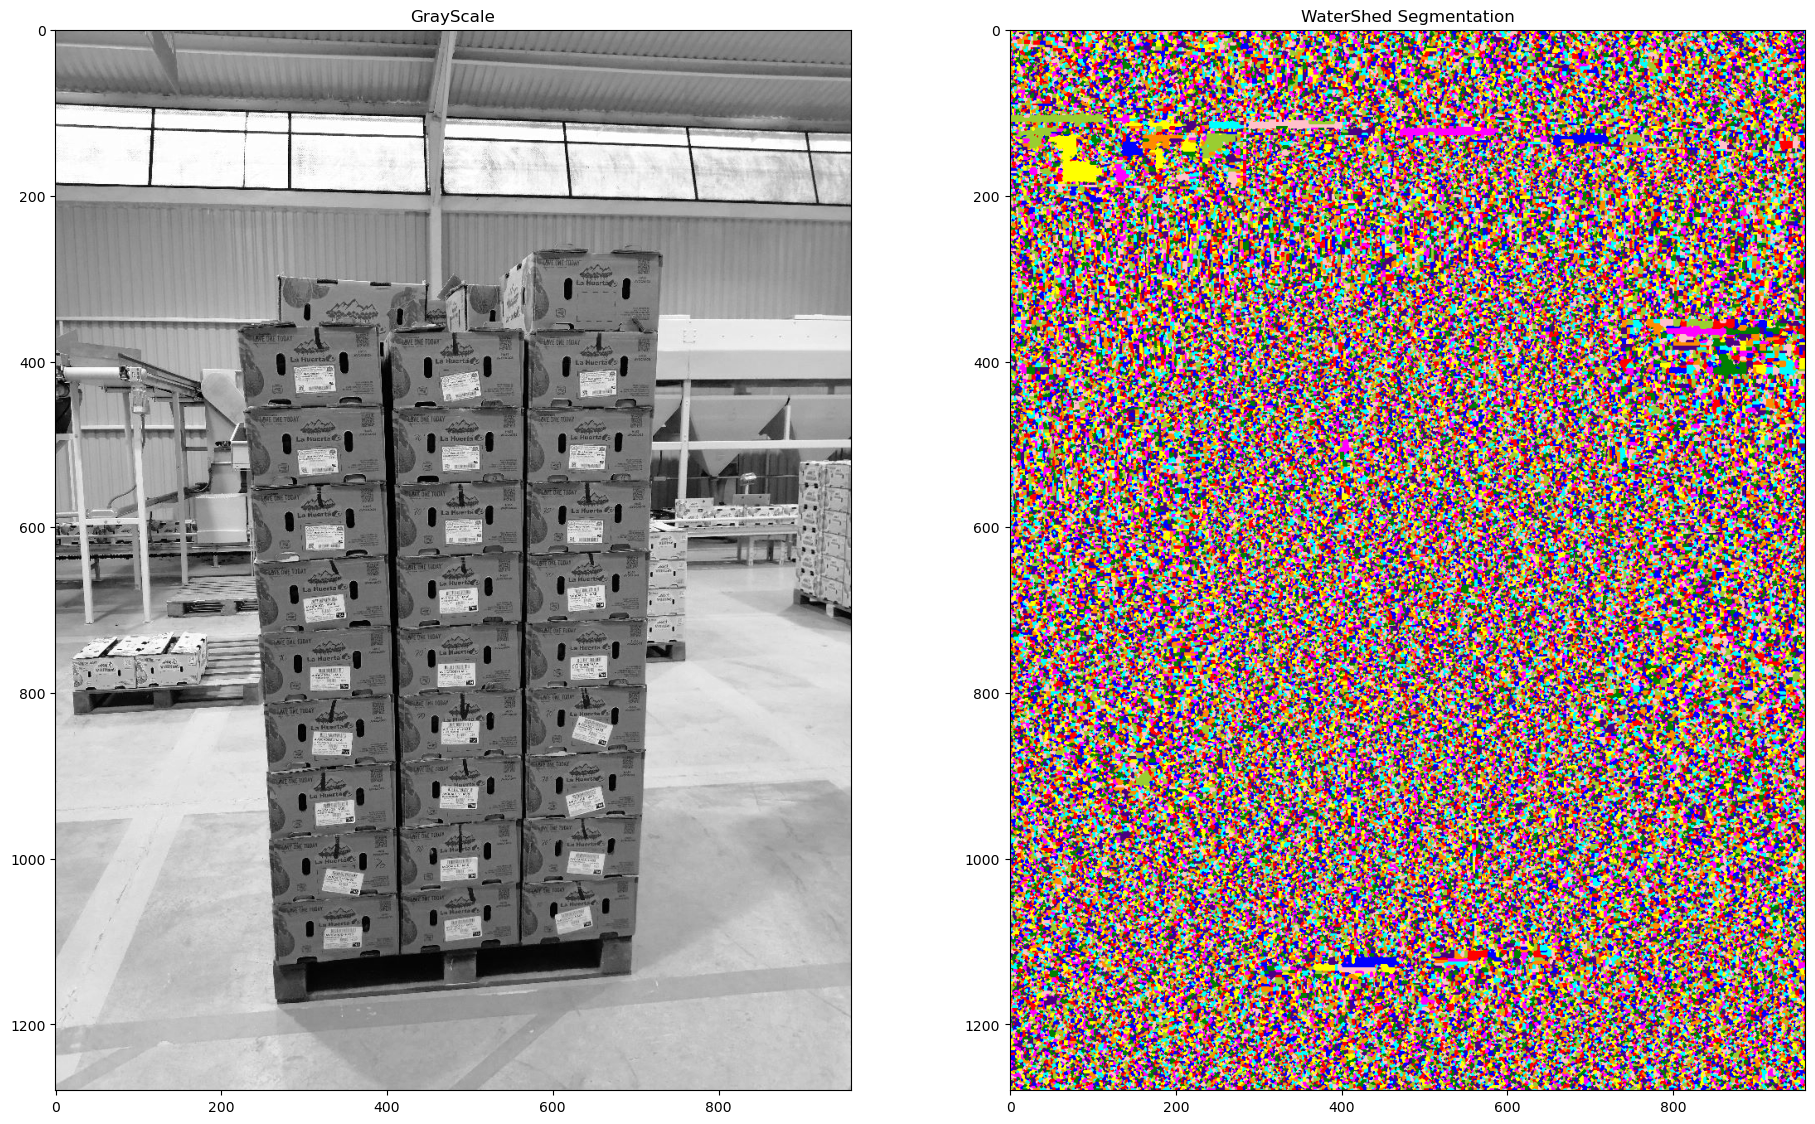

In [604]:
sobelx = cv2.Sobel(imgGray,cv2.CV_64F,1,0) # Find x and y gradients
sobely = cv2.Sobel(imgGray,cv2.CV_64F,0,1)

# Find magnitude and angle
magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
angle = np.arctan2(sobely, sobelx) * (180 / np.pi)

threshWaterShed = watershed(magnitude)
wSSegmentation = label2rgb(threshWaterShed)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1.7)
plt.subplots_adjust(right=1)

plt.subplot(1, 2, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 2, 2)
plt.imshow(wSSegmentation)
plt.title('WaterShed Segmentation');

In [605]:
#(ret, threshInv) = cv2.threshold(imgGray,0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
#print(ret)
#print(threshInv)
#plt.figure(figsize=(20,50))
#plt.imshow(threshInv)